# A. Cleaning and Merging of the Data

### A.1. Importing Libraries

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats

warnings.filterwarnings("ignore")

### A.2. Importing Cab Data

In [3]:
cab_data = pd.read_csv("DataSets/Cab_Data.csv")
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### A.3. Understanding Cab Data

In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [5]:
cab_data.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

### A.4. Type Correction & Adding Columns

In [6]:
#Type of "Date of Travel" column is wrong.
cab_data["Date of Travel"].groupby(cab_data.Company).aggregate([np.min,np.max])

,amin,amax
Company,,
Pink Cab,42371,43465
Yellow Cab,42371,43465


In [7]:
#after looking at the differences in values, it can be inferred that the values of this column are
#number of days after a certain date. Since the date range is provided, it can be inferred that this
#certain date is 1899-12-29
a = cab_data['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab_data['Date of Travel'] = pd.to_datetime(dates, format="%Y-%m-%d %H:%M:%S")

In [8]:
#Now, the Date of Travel column is fixed, but it would be better if it was seperated to years, months, and days
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'])

Day = cab_data['Date of Travel'].dt.day_name()
Month = cab_data['Date of Travel'].dt.month
Year = cab_data['Date of Travel'].dt.year
Day.value_counts()

Thursday     81402
Friday       78234
Saturday     70310
Wednesday    39747
Tuesday      30102
Monday       29860
Sunday       29737
Name: Date of Travel, dtype: int64

In [9]:
cab_data.insert(2, 'Year', Year)
cab_data.insert(3, 'Month', Month)
cab_data.insert(4, 'Day', Day)

cab_data.columns

Index(['Transaction ID', 'Date of Travel', 'Year', 'Month', 'Day', 'Company',
       'City', 'KM Travelled', 'Price Charged', 'Cost of Trip'],
      dtype='object')

### A.5. Adding Profit Column

In [10]:
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']
cab_data['Profit']

0         57.3150
1         23.6660
2         27.5680
3         25.7980
4         16.8440
           ...   
359387     5.8800
359388     6.9020
359389    87.4200
359390    32.1420
359391    13.9608
Name: Profit, Length: 359392, dtype: float64

In [11]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Year            359392 non-null  int64         
 3   Month           359392 non-null  int64         
 4   Day             359392 non-null  object        
 5   Company         359392 non-null  object        
 6   City            359392 non-null  object        
 7   KM Travelled    359392 non-null  float64       
 8   Price Charged   359392 non-null  float64       
 9   Cost of Trip    359392 non-null  float64       
 10  Profit          359392 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 30.2+ MB


In [12]:
cab_data.describe()

,Transaction ID,Year,Month,KM Travelled,Price Charged,Cost of Trip,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017.041693,7.509243,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,0.801378,3.428929,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,2016.000000,1.000000,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,2016.000000,5.000000,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,2017.000000,8.000000,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,2018.000000,11.000000,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,2018.000000,12.000000,48.000000,2048.030000,691.200000,1463.966000


### A.6. Unique Values of Categorical Colums

In [13]:
print(cab_data.Company.unique(),"\n\n", cab_data.City.unique())

['Pink Cab' 'Yellow Cab'] 

 ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


### A.7. Importing City Data

In [14]:
city = pd.read_csv("DataSets/City.csv")

In [15]:
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [16]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


### A.8. Column Type Correction

In [17]:
#Population and Users columns should be changed to be floats
city.Population = city.Population.apply(lambda x: x.replace(",",""))
city.Population = city.Population.astype(float)

city.Users = city.Users.apply(lambda x: x.replace(",",""))
city.Users = city.Users.astype(float)

In [18]:
city.Population.head()

0    8405837.0
1    1955130.0
2    1595037.0
3    1339155.0
4    1177609.0
Name: Population, dtype: float64

In [19]:
city.Users.head()

0    302149.0
1    164468.0
2    144132.0
3     17675.0
4     27247.0
Name: Users, dtype: float64

### A.9. Adding a User Density Column

In [20]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [21]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [22]:
city["User Density(%)"] = city.Users*100/city.Population

In [23]:
city.sort_values(["Population"],ascending=False)

,City,Population,Users,User Density(%)
0,NEW YORK NY,8405837.0,302149.0,3.594514
1,CHICAGO IL,1955130.0,164468.0,8.412126
2,LOS ANGELES CA,1595037.0,144132.0,9.036279
3,MIAMI FL,1339155.0,17675.0,1.319862
4,SILICON VALLEY,1177609.0,27247.0,2.313756
5,ORANGE COUNTY,1030185.0,12994.0,1.261327
6,SAN DIEGO CA,959307.0,69995.0,7.296413
7,PHOENIX AZ,943999.0,6133.0,0.649683
8,DALLAS TX,942908.0,22157.0,2.349858
9,ATLANTA GA,814885.0,24701.0,3.031225


### A.10. Importing and Understanding Customer Data

In [24]:
customer = pd.read_csv("DataSets/Customer_ID.csv")
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [25]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [26]:
customer.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


### A.11. Importing and Understanding the Transaction Data

In [27]:
transaction = pd.read_csv("DataSets/Transaction_ID.csv")
transaction["Transaction ID"].value_counts()

10000011    1
10293418    1
10293416    1
10293415    1
10293414    1
           ..
10146707    1
10146706    1
10146705    1
10146704    1
10440108    1
Name: Transaction ID, Length: 440098, dtype: int64

In [28]:
transaction["Payment_Mode"].value_counts()

Card    263991
Cash    176107
Name: Payment_Mode, dtype: int64

In [29]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


### A.12. Merging the Datasets

In [30]:
cab_copy = cab_data.copy()
city_copy = city.copy()
customer_copy = customer.copy()
transaction_copy = transaction.copy()

In [31]:
ID_data = pd.merge(transaction_copy, customer_copy, on='Customer ID')
ID_and_cab = pd.merge(ID_data, cab_data, on='Transaction ID', how= "outer")
ID_and_cab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      440098 non-null  int64         
 1   Customer ID         440098 non-null  int64         
 2   Payment_Mode        440098 non-null  object        
 3   Gender              440098 non-null  object        
 4   Age                 440098 non-null  int64         
 5   Income (USD/Month)  440098 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Year                359392 non-null  float64       
 8   Month               359392 non-null  float64       
 9   Day                 359392 non-null  object        
 10  Company             359392 non-null  object        
 11  City                359392 non-null  object        
 12  KM Travelled        359392 non-null  float64       
 13  Price Charged       359392 no

In [32]:
#As can be seen, this data contains about 80000 rows that doesn't have
#any value for the company column which almost all the analysis is based on.
#That is why those rows will be dropped.

ID_data = pd.merge(transaction_copy, customer_copy, on='Customer ID')
merged = pd.merge(ID_data, cab_data, on='Transaction ID', how= "right")
master = pd.merge(merged, city_copy, on='City')
master

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Year,Month,Day,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,User Density(%)
0,10000011,29290,Card,Male,28,10813,2016-01-07,2016,1,Thursday,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,814885.0,24701.0,3.031225
1,10000012,27703,Card,Male,27,9237,2016-01-05,2016,1,Tuesday,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,814885.0,24701.0,3.031225
2,10000013,28712,Cash,Male,53,11242,2016-01-01,2016,1,Friday,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,814885.0,24701.0,3.031225
3,10000014,28020,Cash,Male,23,23327,2016-01-06,2016,1,Wednesday,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,814885.0,24701.0,3.031225
4,10000015,27182,Card,Male,33,8536,2016-01-02,2016,1,Saturday,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,814885.0,24701.0,3.031225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,Male,24,15651,2018-01-07,2018,1,Sunday,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,418859.0,127001.0,30.320705
359388,10440104,53286,Cash,Male,32,6528,2018-01-03,2018,1,Wednesday,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,418859.0,127001.0,30.320705
359389,10440105,52265,Cash,Male,56,7966,2018-01-04,2018,1,Thursday,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,418859.0,127001.0,30.320705
359390,10440106,52175,Card,Male,32,6423,2018-01-04,2018,1,Thursday,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,418859.0,127001.0,30.320705


### A.13. Moving the Columns

In [33]:
master = master[['Company', 'Customer ID', 'Transaction ID', 'Payment_Mode', 
                 'Gender', 'Age','Income (USD/Month)', 'Year', 'Month', 'Day',
                 'KM Travelled', 'Price Charged', 'Cost of Trip',
                 'Profit', 'City', 'Population', 'Users', 'User Density(%)']]

In [34]:
master.columns

Index(['Company', 'Customer ID', 'Transaction ID', 'Payment_Mode', 'Gender',
       'Age', 'Income (USD/Month)', 'Year', 'Month', 'Day', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit', 'City', 'Population',
       'Users', 'User Density(%)'],
      dtype='object')

### A.14. Exporting the Finished Datasets

In [35]:
master.to_csv('master.csv', index=False)

In [36]:
grouped = master.groupby(master.Company)
pink_cab = grouped.get_group("Pink Cab")
yellow_cab = grouped.get_group("Yellow Cab")

In [37]:
pink_cab = pink_cab.drop(["Company"], axis=1)
yellow_cab = yellow_cab.drop(["Company"], axis=1)

In [38]:
pink_cab.to_csv('pink_cab.csv', index=False)
yellow_cab.to_csv('yellow_cab.csv', index=False)

# B. EDA and Data Visualization

### B.1. Initial Look and Duplicate Check

In [39]:
master.head()

,Company,Customer ID,Transaction ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day,KM Travelled,Price Charged,Cost of Trip,Profit,City,Population,Users,User Density(%)
0,Pink Cab,29290,10000011,Card,Male,28,10813,2016,1,Thursday,30.45,370.95,313.635,57.315,ATLANTA GA,814885.0,24701.0,3.031225
1,Pink Cab,27703,10000012,Card,Male,27,9237,2016,1,Tuesday,28.62,358.52,334.854,23.666,ATLANTA GA,814885.0,24701.0,3.031225
2,Pink Cab,28712,10000013,Cash,Male,53,11242,2016,1,Friday,9.04,125.20,97.632,27.568,ATLANTA GA,814885.0,24701.0,3.031225
3,Pink Cab,28020,10000014,Cash,Male,23,23327,2016,1,Wednesday,33.17,377.40,351.602,25.798,ATLANTA GA,814885.0,24701.0,3.031225
4,Pink Cab,27182,10000015,Card,Male,33,8536,2016,1,Saturday,8.73,114.62,97.776,16.844,ATLANTA GA,814885.0,24701.0,3.031225


In [40]:
master.describe()

,Customer ID,Transaction ID,Age,Income (USD/Month),Year,Month,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,User Density(%)
count,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,19191.652115,1.022076e+07,35.336705,15048.822937,2017.041693,7.509243,22.567254,423.443311,286.190113,137.253198,3.132198e+06,158365.582267,10.668662
std,21012.412463,1.268058e+05,12.594234,7969.409482,0.801378,3.428929,12.233526,274.378911,157.993661,160.311840,3.315194e+06,100850.051020,10.633114
min,1.000000,1.000001e+07,18.000000,2000.000000,2016.000000,1.000000,1.900000,15.600000,19.000000,-220.060000,2.489680e+05,3643.000000,0.649683
25%,2705.000000,1.011081e+07,25.000000,8424.000000,2016.000000,5.000000,12.000000,206.437500,151.200000,28.012000,6.712380e+05,80021.000000,3.594514
50%,7459.000000,1.022104e+07,33.000000,14685.000000,2017.000000,8.000000,22.440000,386.360000,282.480000,81.962000,1.595037e+06,144132.000000,7.296413
75%,36078.000000,1.033094e+07,42.000000,21035.000000,2018.000000,11.000000,32.960000,583.660000,413.683200,190.030000,8.405837e+06,302149.000000,9.036279
max,60000.000000,1.044011e+07,65.000000,35000.000000,2018.000000,12.000000,48.000000,2048.030000,691.200000,1463.966000,8.405837e+06,302149.000000,32.141078


In [41]:
master[master.duplicated()]

,Company,Customer ID,Transaction ID,Payment_Mode,Gender,Age,Income (USD/Month),Year,Month,Day,KM Travelled,Price Charged,Cost of Trip,Profit,City,Population,Users,User Density(%)


### B.2. Correlation Matrix and Pairplot

<AxesSubplot:>

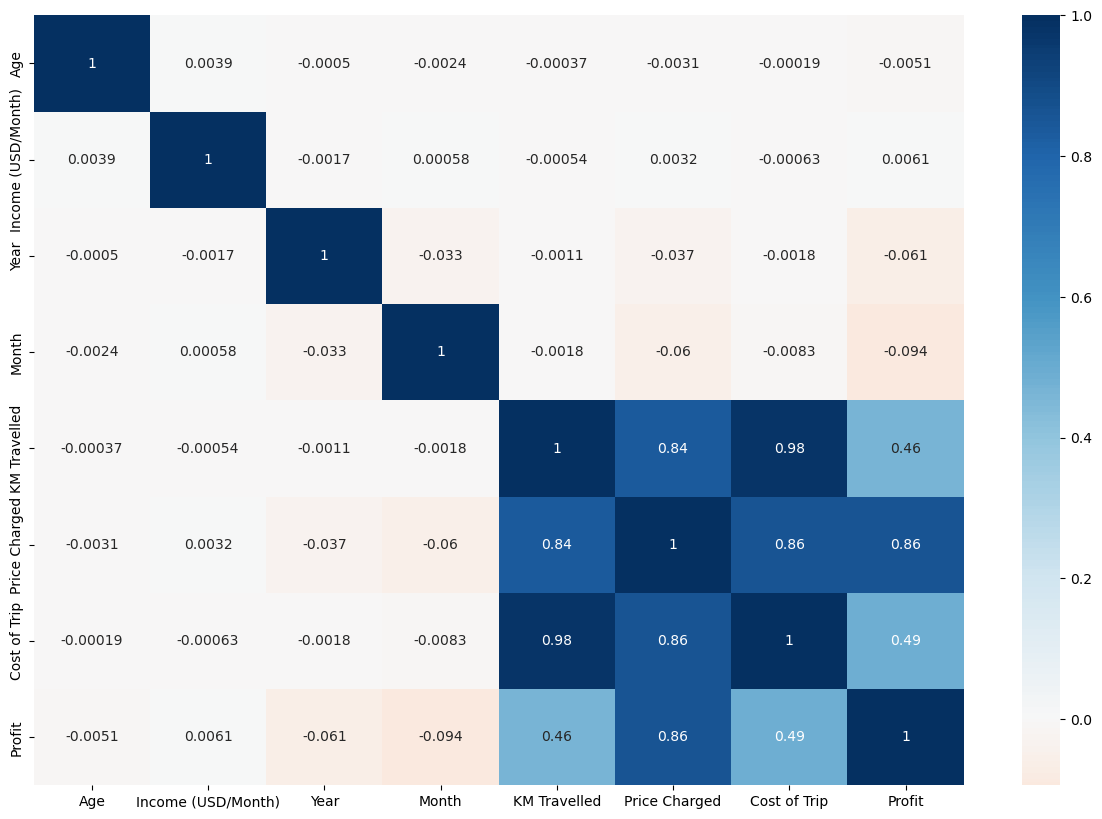

In [42]:
#correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(master[['Age', 'Income (USD/Month)', 'Year', 'Month', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']].corr(), center=0, annot=True, cmap="RdBu", ax=ax)

It seems that age, income, month, and day columns don't show a clear correlation with the rest of the columns.
Also, as it would be expected, Km travelled, price charged, and trip cost are closely correlated.
Strangely, profit is weakly correlated with Km travelled or trip cost.

<AxesSubplot:>

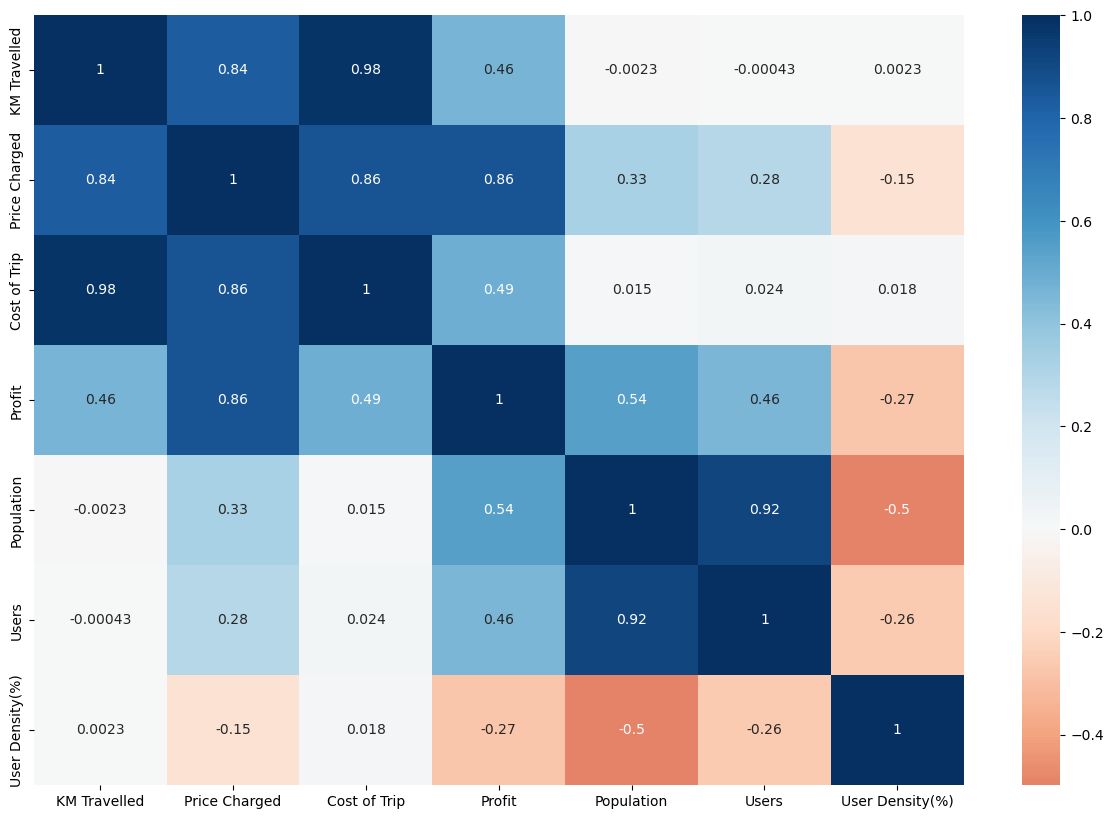

In [43]:
#a more accurate correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(master[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Population',
       'Users', 'User Density(%)']].corr(), center=0, annot=True, cmap="RdBu", ax=ax)

Since trip cost and Km travelled are highly positive correlated, their relation doesn't give useful information.

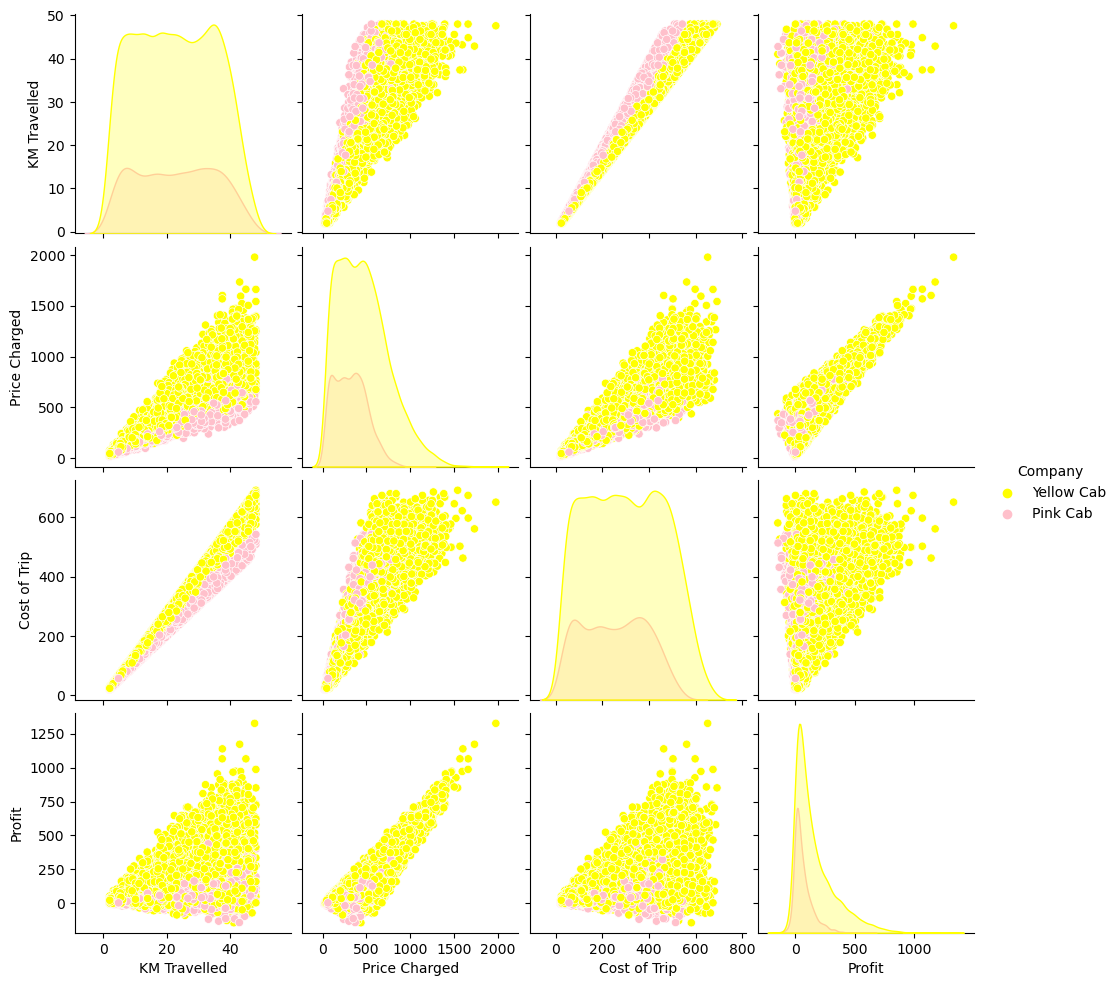

In [44]:
sns.pairplot(master[['KM Travelled', 'Price Charged', 'Cost of Trip','Profit','Company' ]].sample(10000), hue = 'Company',
             palette= {"Pink Cab":"pink","Yellow Cab":"yellow"})

### B.3. Understanding Categorical Columns

In [45]:
cat_col = ['Company', 'City', 'Payment_Mode', 'Gender']
for name in cat_col:
    print(f"-------------{name}----------------")
    print("TOTAL: ", master[name].count())
    print(master[name].value_counts())
print("##############END###############")

-------------Company----------------
TOTAL:  359392
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
-------------City----------------
TOTAL:  359392
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64
-------------Payment_Mode----------------
TOTAL:  359392
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64
-------------Gender----------------
TOTAL:  359392
Male      205912
Female    153480
Name: Gender, dtype: int64
##############END###############


**CONCLUSION:** Clearly, we can see the number of categorical data to each datafield. Some nice observations are: They are only two types of Cab companies Yellow Cab and Pink Cab. Yellow Cab is widely preferred by the customers. Payment_Mode - Card payment has 2/3rd of the Cash payment. Also, Male and Female customers ratio is somewhat 4:3

### B.4. Monthly Revenues and Satisfaction Ratio

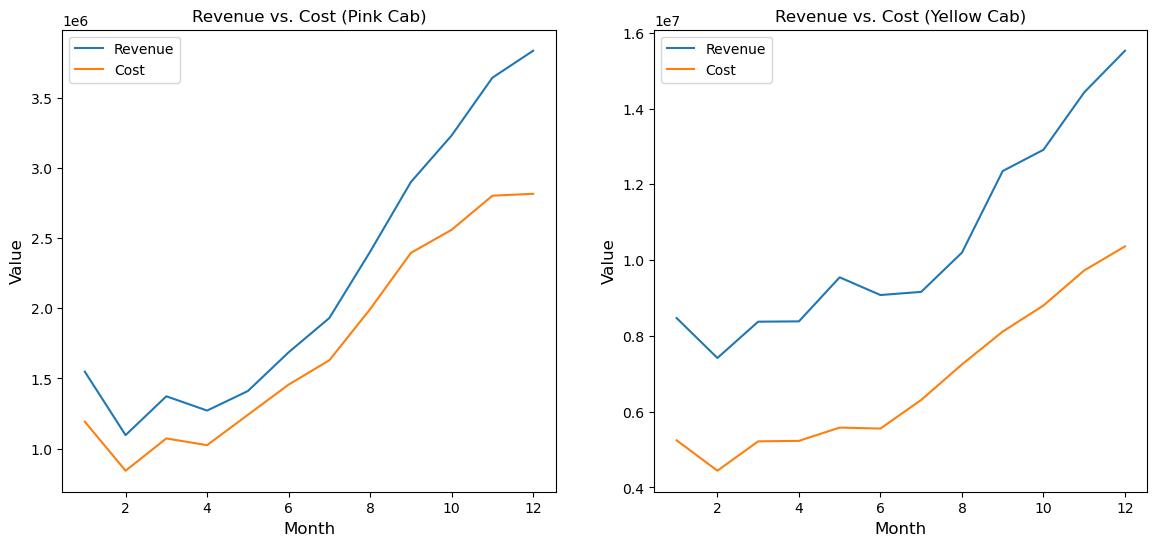

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
sns.lineplot(x=master[master.Company=='Pink Cab'].groupby(['Month'])["Price Charged"].sum().index,
            y=master[master.Company=='Pink Cab'].groupby(['Month'])["Price Charged"].sum().values, ax=axs[0])
sns.lineplot(x=master[master.Company=='Pink Cab'].groupby(['Month'])["Cost of Trip"].sum().index,
            y=master[master.Company=='Pink Cab'].groupby(['Month'])["Cost of Trip"].sum().values, ax=axs[0])
axs[0].set_title('Revenue vs. Cost (Pink Cab)',fontsize = 12)
axs[0].set_xlabel('Month', fontsize = 12)
axs[0].set_ylabel('Value',fontsize = 12)
axs[0].legend(["Revenue","Cost"], )
axs[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

sns.lineplot(x=master[master.Company=='Yellow Cab'].groupby(['Month'])["Price Charged"].sum().index,
            y=master[master.Company=='Yellow Cab'].groupby(['Month'])["Price Charged"].sum().values, ax=axs[1])
sns.lineplot(x=master[master.Company=='Yellow Cab'].groupby(['Month'])["Cost of Trip"].sum().index,
            y=master[master.Company=='Yellow Cab'].groupby(['Month'])["Cost of Trip"].sum().values, ax=axs[1])
axs[1].set_title('Revenue vs. Cost (Yellow Cab)',fontsize = 12)
axs[1].set_xlabel('Month', fontsize = 12)
axs[1].set_ylabel('Value',fontsize = 12)
axs[1].legend(["Revenue","Cost"])
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))


plt.show()

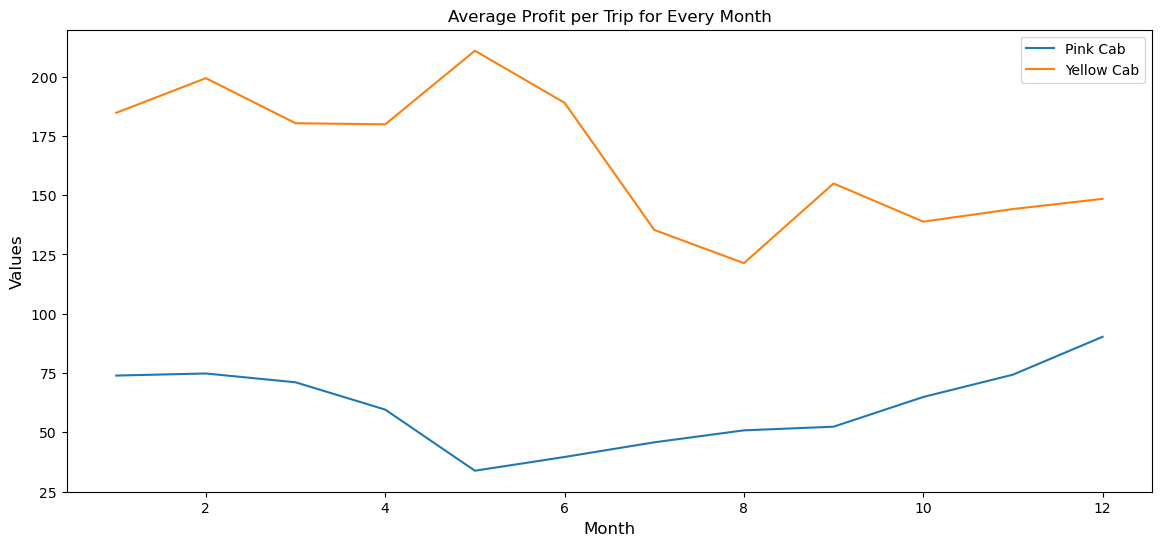

In [47]:
# Calculate travel frequency by month and average profit per trip for Pink Cab and Yellow Cab
pink_cab_plot = pink_cab.groupby(['Month'])["Profit"].sum()/pink_cab.groupby(['Month'])["Transaction ID"].count()
yellow_cab_plot = yellow_cab.groupby(['Month'])["Profit"].sum()/yellow_cab.groupby(['Month'])["Transaction ID"].count()

# Create a figure
plt.figure(figsize=(14,6))

# Plot Pink Cab data
sns.lineplot(x=pink_cab_plot.index, y=pink_cab_plot.values, label='Pink Cab')

# Plot Yellow Cab data
sns.lineplot(x=yellow_cab_plot.index, y=yellow_cab_plot.values, label='Yellow Cab')

# Set title and axis labels
plt.title('Average Profit per Trip for Every Month', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Display the legend
plt.legend()


# Display the plot
plt.show()

### B.5. Total Transaction Count and Price Charged

Text(0, 0.5, 'Cab name')

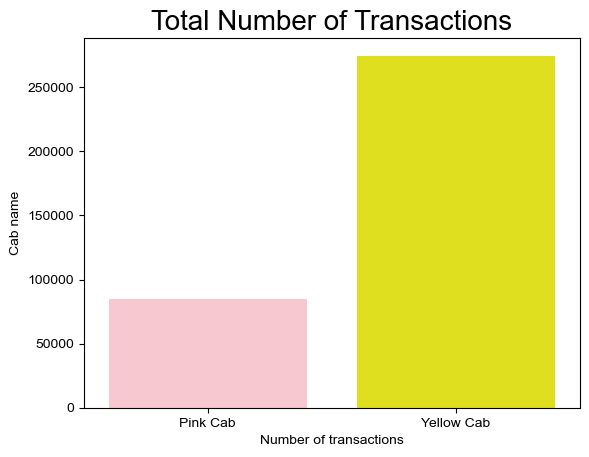

In [48]:
#Plotting the total number of transactions per cab company
figure1 = sns.countplot(x="Company", data=master, palette=["pink","yellow"])
plt.title("Total Number of Transactions", fontsize = 20)
sns.set_style("whitegrid")
figure1.set_xlabel("Number of transactions", fontsize = 10)
figure1.set_ylabel("Cab name", fontsize = 10)

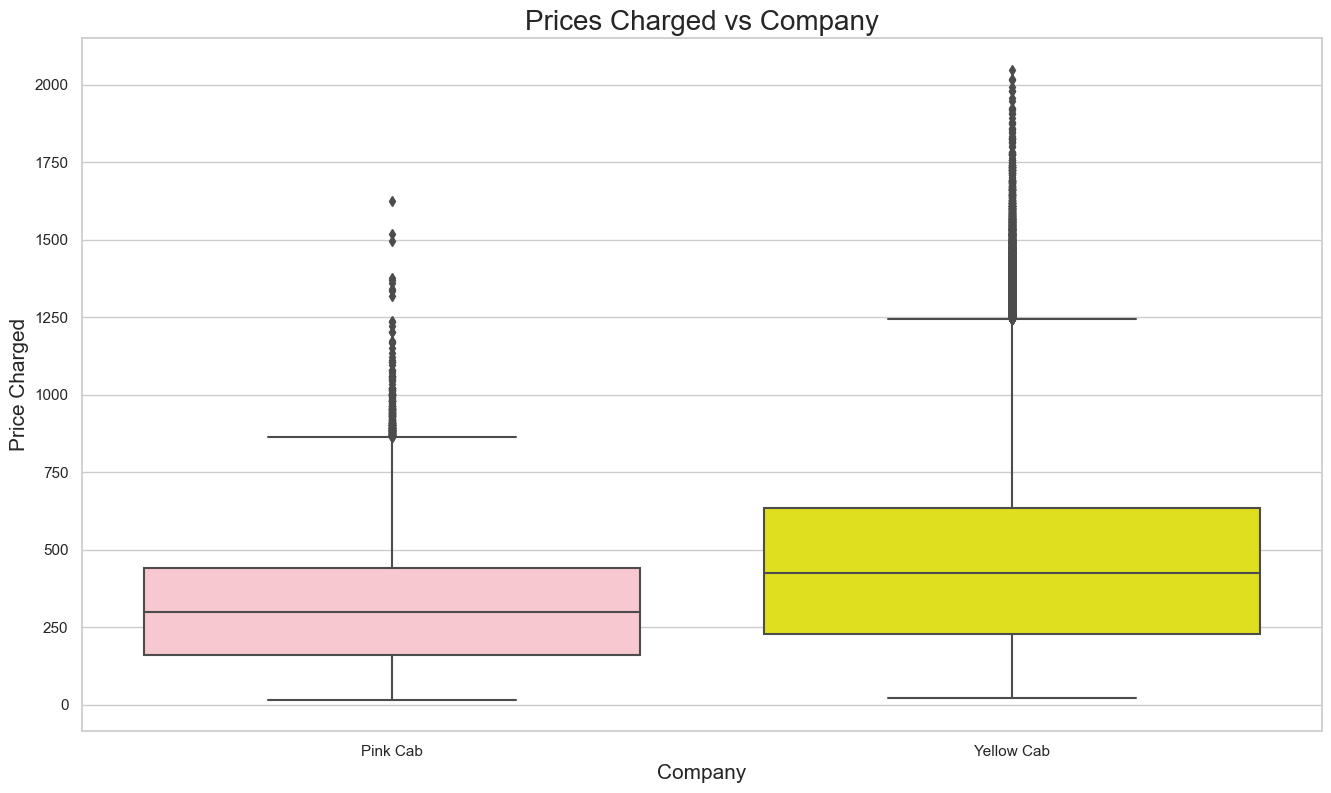

In [49]:
#Plotting the prices charged by these companies
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
figure6 = sns.boxplot(master['Company'], master['Price Charged'],palette=['pink', 'yellow'])
plt.title('Prices Charged vs Company', fontsize=20)
figure6.set_xlabel("Company", fontsize = 15)
figure6.set_ylabel("Price Charged", fontsize = 15)
plt.show()

### B.6. Payment Mode and Gender

Text(0, 0.5, 'Number of transaction')

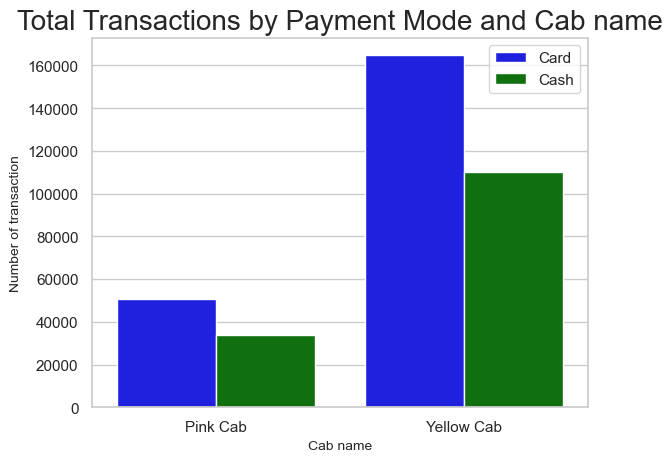

In [50]:
#Plotting the total number of transactions per cab company by method of payment
figure2 = sns.countplot(x="Company", hue="Payment_Mode", data=master, orient="h", palette=["blue","green"])
plt.title("Total Transactions by Payment Mode and Cab name", fontsize = 20)
sns.set_style("whitegrid")
plt.legend()
figure2.set_xlabel("Cab name", fontsize = 10)
figure2.set_ylabel("Number of transaction", fontsize = 10)

Text(0, 0.5, 'Number of transaction')

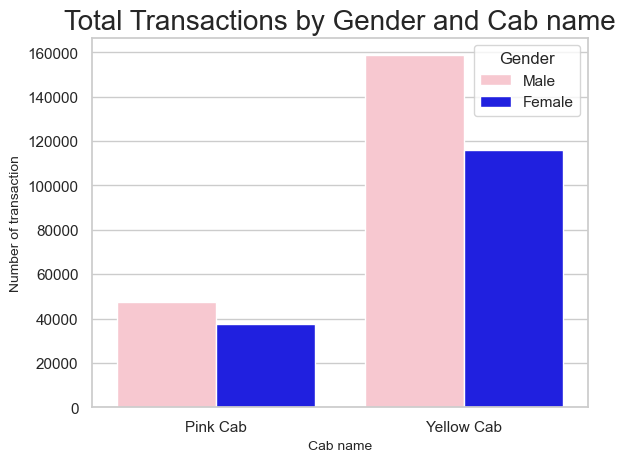

In [51]:
#Plotting the total number of transactions per cab company by gender
figure3 = sns.countplot(x="Company", hue="Gender", data=master, orient="h", palette=["pink","blue"])
plt.title("Total Transactions by Gender and Cab name", fontsize =20)
sns.set_style("whitegrid")
figure3.set_xlabel("Cab name", fontsize = 10)
figure3.set_ylabel("Number of transaction", fontsize = 10)

# C. Hypothesis Testing

Here are my hypotheses:
1. Yellow Cab has a higher proportion of customers who use cash payment modes compared to Pink Cab.
2. Pink Cab customers travel longer distances in average than to Yellow Cab.
3. Yellow Cab has higher number of female customers than Pink Cab.
4. Yellow Cab generally has older customers.
5. Price charged is correlated with the Income of the customer.

### C.1. Hypothesis 1

> *H0* : Yellow Cab has a higher proportion of customers who use cash payment modes compared to Pink Cab.

> *H1* : Yellow Cab doesn't have a higher proportion of customers who use cash payment modes compared to Pink Cab.

In [59]:
h1p1 = pink_cab[pink_cab.Payment_Mode=="Cash"].Payment_Mode.count()
h1p2 = pink_cab.Payment_Mode.count()
h1p = h1p1/h1p2

h1y1 = yellow_cab[yellow_cab.Payment_Mode=="Cash"].Payment_Mode.count()
h1y2 = yellow_cab.Payment_Mode.count()
h1y = h1y1/h1y2

if h1y>h1p:
    print("We accept the null hypothesis (H0) that Yellow Cab has a",
          "higher proportion of customers who use cash payment modes",
          "compared to Pink Cab.")
else:
    print("We accept the alternative hypothesis (H1) that Yellow Cab",
          "doesn't have a higher proportion of customers who use cash",
          "payment modes compared to Pink Cab.")

We accept the alternative hypothesis (H1) that Yellow Cab doesn't have a higher proportion of customers who use cash payment modes compared to Pink Cab.


<span style="color:blue">Pink cab has a higher proportion of customers who use cash payment modes compared to Yellow Cab.</span>

### C.2. Hypothesis 2

> *H0* : Pink Cab customers travel longer distances in average than Yellow Cab.

> *H1* : Pink Cab customers don't travel longer distances in average than Yellow Cab.

In [53]:
h2p = pink_cab["KM Travelled"].sum() / pink_cab["Transaction ID"].count()

h2y = yellow_cab["KM Travelled"].sum() / yellow_cab["Transaction ID"].count()

if h2p>h2y:
    print("We accept the null hypothesis (H0) that Pink Cab customers",
          "travel longer distances in average than Yellow Cab.")
else:
    print("We accept the alternative hypothesis (H1) that Pink Cab customers",
    "don't travel longer distances in average than Yellow Cab.")

We accept the alternative hypothesis (H1) that Pink Cab customers don't travel longer distances in average than to Yellow Cab.


<span style="color:blue"> Yellow Cab customers travel longer distances in average than to Pink Cab.</span>

### C.3. Hypothesis 3

> *H0* : Yellow Cab has higher number of female customers than Pink Cab.

> *H1* : Yellow Cab doesn't have higher number of female customers than Pink Cab.

In [54]:
gender_cab=master.groupby(['Company','Gender'])["Customer ID"].nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64

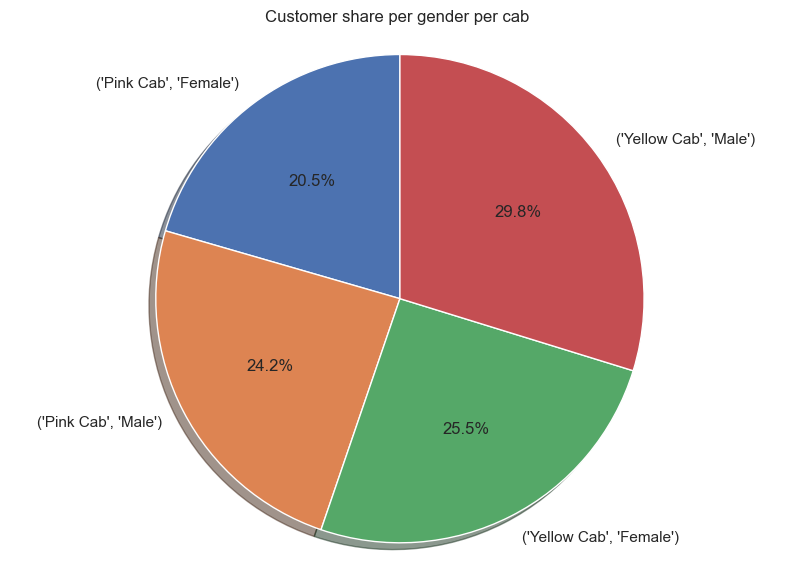

We accept the null hypothesis (H0) that Yellow Cab has higher number of female customers than Pink Cab.


In [55]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()
print("We accept the null hypothesis (H0) that Yellow Cab has higher number of female customers than Pink Cab.")

<span style="color:blue"> Yellow Cab has higher number of female customers than Pink Cab.</span>

### C.4. Hypothesis 4

> *H0* : Yellow Cab generally has older customers. 

> *H1* : Yellow Cab generally doesn't have older customers.

In [56]:
h4p = pink_cab.Age.mean()
h4y = yellow_cab.Age.mean()
print("Average customer age of Pink Cab:", h4p)
print("Average customer age of Yellow Cab:", h4y)

if h4y>h4p:
    print("We accept the null hypothesis (H0) that",
          "Yellow Cab generally has older customers.")
else:
    print("We accept the alternative hypothesis (H1) that",
          "Yellow Cab generally doesn't have older customers.")

Average customer age of Pink Cab: 35.322413854162974
Average customer age of Yellow Cab: 35.34111205361856
We accept the null hypothesis (H0) that Yellow Cab generally has older customers.


<span style="color:blue"> Altough noticably insignificant, Yellow Cab generally has older customers.</span>

### C.5. Hypothesis 5

> *H0* : Price charged is correlated with the Income of the customer.

> *H1* : Price charged is not correlated with the Income of the customer.

In [57]:
h5 = master["Price Charged"].corr(master["Income (USD/Month)"])

if h5>0.5 or h5<-0.5:
    print("We accept the null hypothesis (H0) that Price",
          "charged is correlated with the Income of the customer.")
else:
    print("We accept the alternative hypothesis (H1) that Price",
          "charged is not correlated with the Income of the customer.")

We accept the alternative hypothesis (H1) that Price charged is not correlated with the Income of the customer.


<span style="color:blue"> Price charged is not correlated with the Income of the customer.</span>